In [1]:
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np

import tableone
import scipy

In [2]:
Data = pd.read_csv("12.Censored_clinical_lungCancer_survival.csv")
print(Data.shape)
Data.info()

(490, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PatientID   490 non-null    int64  
 1   Age         490 non-null    int64  
 2   Sex         490 non-null    int64  
 3   Smoke       490 non-null    int64  
 4   COPD        490 non-null    int64  
 5   DM          490 non-null    int64  
 6   HTN         490 non-null    int64  
 7   CEA_pre     453 non-null    float64
 8   SUV         414 non-null    float64
 9   Extent      490 non-null    int64  
 10  Vascular    490 non-null    int64  
 11  Lymphatic   490 non-null    int64  
 12  Perineural  490 non-null    int64  
 13  VPI         490 non-null    int64  
 14  Adjacent    490 non-null    int64  
 15  Aerogenous  490 non-null    int64  
 16  pT          490 non-null    int64  
 17  pN          490 non-null    int64  
 18  pStage      490 non-null    int64  
 19  cell        490 non

In [3]:
columns = ['Age', 'Sex', 'Smoke', 'COPD', 'DM', 'HTN', 'CEA_pre', 'CEA_Post', 'pStage', 'Relapse']

In [4]:
groupby = ['Smoke']
nonnormal = ['Age', 'CEA_pre', 'CEA_Post']
categorical = ['Sex', 'COPD', 'DM', 'HTN', 'pStage', 'Relapse']

In [5]:
Data['pStage'].value_counts()

4    180
5    172
2     75
6     40
3     23
Name: pStage, dtype: int64

In [6]:
mytable = tableone.TableOne(Data,
                   columns=columns,
                   categorical=categorical,
                   nonnormal=nonnormal,
                   groupby=groupby,
                   pval=True)

In [7]:
print(mytable.tabulate(tablefmt = "f"))

                              Missing    Overall           1                 2                 P-Value
------------------------  --  ---------  ----------------  ----------------  ----------------  ---------
n                                        490               205               285
Age, median [Q1,Q3]           0          64.0 [57.0,70.0]  62.0 [54.0,70.0]  65.0 [58.0,70.0]  0.010
Sex, n (%)                1   0          304 (62.0)        30 (14.6)         274 (96.1)        <0.001
                          2              186 (38.0)        175 (85.4)        11 (3.9)
COPD, n (%)               0   0          476 (97.1)        203 (99.0)        273 (95.8)        0.065
                          1              14 (2.9)          2 (1.0)           12 (4.2)
DM, n (%)                 0   0          385 (78.6)        172 (83.9)        213 (74.7)        0.020
                          1              105 (21.4)        33 (16.1)         72 (25.3)
HTN, n (%)                0   0          299 (6

In [8]:
scipy.stats.shapiro([5,5.4, 5.3, 5.2, 5.8, 5.6, 5.8, 6.3, 4.2])

ShapiroResult(statistic=0.9573119282722473, pvalue=0.7698087692260742)

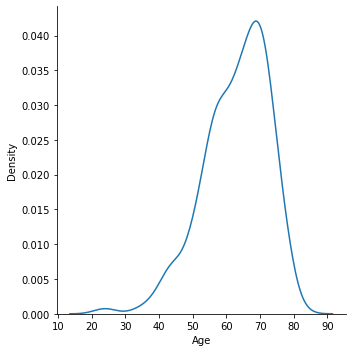

In [9]:
#kde: kernel density estimation
sns.displot(Data, x="Age", kind="kde")

In [10]:
scipy.stats.ttest_ind(
    Data[Data['Smoke'] == 1]['Age'],
    Data[Data['Smoke'] == 2]['Age']
)

Ttest_indResult(statistic=-3.1283943499987004, pvalue=0.0018627455613594202)

In [11]:
scipy.stats.mannwhitneyu(
    Data[Data['Smoke'] == 1]['Age'],
    Data[Data['Smoke'] == 2]['Age']
)

MannwhitneyuResult(statistic=25253.0, pvalue=0.010400512446192547)

Logistic Regression task (Table 2)

In [12]:
groupby = ['Smoke']
label = ['Relapse']
nonnormal = ['Age', 'CEA_pre', 'CEA_Post']
categorical = ['Sex', 'COPD', 'DM', 'HTN', 'pStage']

In [13]:
pd.get_dummies(Data[categorical].astype('str'), drop_first=True)

,Sex_2,COPD_1,DM_1,HTN_1,pStage_3,pStage_4,pStage_5,pStage_6
0,1,0,0,1,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,1,0,1,1,0,1,0,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
485,1,0,0,0,0,1,0,0
486,0,0,1,1,0,1,0,0
487,0,0,1,1,0,0,1,0
488,0,0,1,1,0,1,0,0


In [14]:
DummyData = pd.concat(
    [
        Data['Relapse'],
        Data[nonnormal],
        pd.get_dummies(Data[categorical].astype('str'), drop_first=True)
    ],axis=1)
DummyData.head()

,Relapse,Age,CEA_pre,CEA_Post,Sex_2,COPD_1,DM_1,HTN_1,pStage_3,pStage_4,pStage_5,pStage_6
0,0,73,1.0,0.0,1,0,0,1,0,1,0,0
1,0,73,1.4,1.2,0,0,0,0,0,1,0,0
2,1,53,1.7,1.8,0,0,0,0,0,1,0,0
3,0,57,1.0,0.0,1,0,1,1,0,1,0,0
4,0,42,1.0,1.2,0,0,0,0,0,0,1,0


In [15]:
DummyData = DummyData.dropna()

In [16]:
DummyData

,Relapse,Age,CEA_pre,CEA_Post,Sex_2,COPD_1,DM_1,HTN_1,pStage_3,pStage_4,pStage_5,pStage_6
0,0,73,1.0,0.0,1,0,0,1,0,1,0,0
1,0,73,1.4,1.2,0,0,0,0,0,1,0,0
2,1,53,1.7,1.8,0,0,0,0,0,1,0,0
3,0,57,1.0,0.0,1,0,1,1,0,1,0,0
4,0,42,1.0,1.2,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
483,1,80,3.9,11.6,0,0,0,0,0,1,0,0
484,1,35,1.6,200.0,1,0,0,0,0,0,1,0
487,0,63,1.9,2.2,0,0,1,1,0,0,1,0
488,0,57,2.4,5.2,0,0,1,1,0,1,0,0


In [17]:
Vari, Odds, Pval, Conf = [], [], [], []

for Feature in DummyData.columns[1:8]:
    InputFeature = DummyData[Feature]
    InputFeature = sm.add_constant(InputFeature)
    model = sm.Logit(DummyData['Relapse'], InputFeature).fit()
    
    Vari.append(Feature)
    Odds.append(np.exp(model.params[1]))
    Pval.append(model.pvalues[1])
    Conf.append(np.exp(model.conf_int().loc[Feature].tolist()).round(3))

Optimization terminated successfully.
         Current function value: 0.677951
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678190
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.654340
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.674967
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678318
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678113
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675684
         Iterations 4


In [18]:
InputFeature = DummyData[DummyData.columns[8:]]
InputFeature = sm.add_constant(InputFeature)
model = sm.Logit(DummyData['Relapse'], InputFeature).fit()

Optimization terminated successfully.
         Current function value: 0.663133
         Iterations 5


In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Relapse   No. Observations:                  427
Model:                          Logit   Df Residuals:                      422
Method:                           MLE   Df Model:                            4
Date:                Wed, 14 Sep 2022   Pseudo R-squ.:                 0.02259
Time:                        16:16:28   Log-Likelihood:                -283.16
converged:                       True   LL-Null:                       -289.70
Covariance Type:            nonrobust   LLR p-value:                   0.01084
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8267      0.262     -3.160      0.002      -1.339      -0.314
pStage_3      -0.4951      0.621     -0.798      0.425      -1.711       0.721
pStage_4       0.4158      0.309      1.344      0.179      -0.191       1.022
pStage_5       0.6931      0.309      2.246      0.025       0.088       1.298
pStage_6       1.1632      0.427      2.721      0.007       0.325       2.001
==============================================================================
"""

In [20]:
model.params

const      -0.826679
pStage_3   -0.495077
pStage_4    0.415764
pStage_5    0.693147
pStage_6    1.163151
dtype: float64

In [21]:
Vari = Vari + DummyData.columns[8:].tolist()
Odds = Odds + model.params[1:].tolist()
Pval = Pval + model.pvalues[1:].tolist()
for idx in range(4):
    Conf.append(np.exp(model.conf_int().loc[DummyData.columns[8:]].iloc[idx].tolist()).round(3))

In [22]:
Conf = ['-'.join(map(str, IDX)) for IDX in Conf]

In [23]:
pd.DataFrame({
    'Variable': Vari,
    'OddsRatio': Odds,
    'CI':Conf,
    'Pvalue':Pval
})

,Variable,OddsRatio,CI,Pvalue
0,Age,0.993492,0.974-1.013,0.508969
1,CEA_pre,1.003250,0.99-1.017,0.629952
2,CEA_Post,1.028555,1.007-1.051,0.009271
3,Sex_2,1.419787,0.954-2.113,0.084015
4,COPD_1,0.802642,0.231-2.784,0.729029
5,DM_1,1.139259,0.714-1.819,0.584779
6,HTN_1,0.732404,0.492-1.09,0.124976
7,pStage_3,-0.495077,0.181-2.057,0.425006
8,pStage_4,0.415764,0.826-2.779,0.178992
9,pStage_5,0.693147,1.092-3.662,0.024701


In [24]:
DummyData
InputFeature = DummyData.drop(['Relapse'], axis=1)
InputFeature = sm.add_constant(InputFeature)
model = sm.Logit(DummyData['Relapse'], InputFeature).fit()

Optimization terminated successfully.
         Current function value: 0.634669
         Iterations 8


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Relapse   No. Observations:                  427
Model:                          Logit   Df Residuals:                      415
Method:                           MLE   Df Model:                           11
Date:                Wed, 14 Sep 2022   Pseudo R-squ.:                 0.06455
Time:                        16:16:28   Log-Likelihood:                -271.00
converged:                       True   LL-Null:                       -289.70
Covariance Type:            nonrobust   LLR p-value:                 9.879e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7891      0.724     -1.091      0.275      -2.207       0.629
Age           -0.0029      0.011     -0.259      0.795      -0.025       0.019
CEA_pre       -0.0021      0.008     -0.271      0.786      -0.017       0.013
CEA_Post       0.0239      0.011      2.252      0.024       0.003       0.045
Sex_2          0.3742      0.219      1.708      0.088      -0.055       0.804
COPD_1        -0.4897      0.712     -0.688      0.492      -1.886       0.906
DM_1           0.3578      0.271      1.322      0.186      -0.173       0.888
HTN_1         -0.4364      0.235     -1.854      0.064      -0.898       0.025
pStage_3      -0.5393      0.639     -0.844      0.398      -1.791       0.712
pStage_4       0.4313      0.317      1.359      0.174      -0.191       1.053
pStage_5       0.5877      0.323      1.818      0.069      -0.046       1.221
pStage_6       1.1230      0.449      2.499      0.012       0.242       2.004
==============================================================================
"""

In [26]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
X_train = DummyData.drop(['Relapse'], axis=1)
Y_train = DummyData['Relapse']

forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [27]:
feature_names = X_train.columns
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [28]:
import matplotlib.pyplot as plt

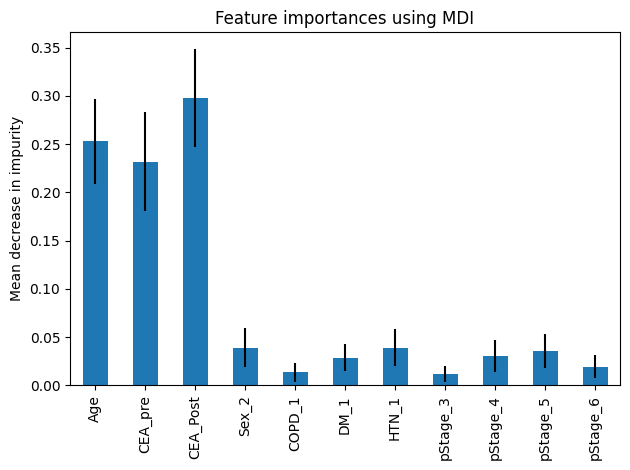

In [29]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()